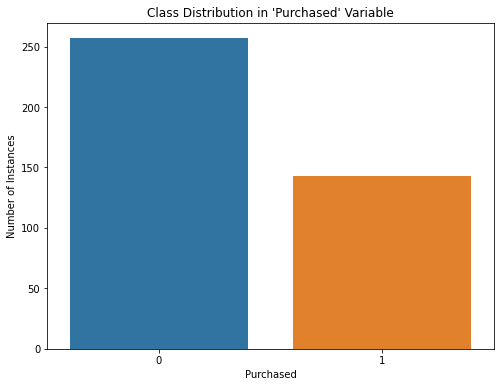

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the uploaded dataset
df_encoded = pd.read_csv('Social_Network_Ads_Encoded.csv')

# Plotting the class distribution in the Purchased variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Purchased', data=df_encoded)
plt.title("Class Distribution in 'Purchased' Variable")
plt.ylabel('Number of Instances')
plt.xlabel('Purchased')
plt.show()


In [ ]:
    # The majority of instances (users) did not make a purchase (represented by the value 0).
    # A smaller number of instances (users) made a purchase (represented by the value 1).

In [3]:
from sklearn.model_selection import train_test_split

# Dropping the target variable and the original non-encoded columns
X = df_encoded.drop(columns=['Purchased', 'Gender', 'AgeBracket'])
y = df_encoded['Purchased']

# Splitting the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((320, 9), (80, 9))

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score
import time

# Defining the classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier()
}

# Initializing a dictionary to store the results
results = {}

# Using 10-fold cross-validation
k = 10
for name, clf in classifiers.items():
    start_time = time.time()
    
    # Cross-validation
    cv_acc = cross_val_score(clf, X_train, y_train, cv=k, scoring='accuracy').mean()
    cv_recall = cross_val_score(clf, X_train, y_train, cv=k, scoring='recall').mean()
    
    # Training the model and making predictions on the test set
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:,1]
    
    # Evaluating the model on the test set
    test_acc = accuracy_score(y_test, y_pred)
    test_recall = recall_score(y_test, y_pred)
    test_roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    end_time = time.time()
    comp_time = end_time - start_time
    
    # Storing the results
    results[name] = {
        "CV Accuracy": cv_acc,
        "CV Recall": cv_recall,
        "Test Accuracy": test_acc,
        "Test Recall": test_recall,
        "Test ROC AUC": test_roc_auc,
        "Computation Time (s)": comp_time
    }

results


{'Logistic Regression': {'CV Accuracy': 0.79375,
  'CV Recall': 0.5393939393939393,
  'Test Accuracy': 0.825,
  'Test Recall': 0.5714285714285714,
  'Test ROC AUC': 0.893543956043956,
  'Computation Time (s)': 0.28566813468933105},
 'SVM': {'CV Accuracy': 0.78125,
  'CV Recall': 0.4545454545454546,
  'Test Accuracy': 0.825,
  'Test Recall': 0.5,
  'Test ROC AUC': 0.7620192307692307,
  'Computation Time (s)': 0.4277920722961426},
 'Decision Tree': {'CV Accuracy': 0.859375,
  'CV Recall': 0.809090909090909,
  'Test Accuracy': 0.875,
  'Test Recall': 0.8571428571428571,
  'Test ROC AUC': 0.8708791208791209,
  'Computation Time (s)': 0.11867690086364746}}

In [5]:
# Convert the results into a DataFrame for tabulation
results_df = pd.DataFrame(results).T

# Displaying the table
results_df


,CV Accuracy,CV Recall,Test Accuracy,Test Recall,Test ROC AUC,Computation Time (s)
Logistic Regression,0.793750,0.539394,0.825,0.571429,0.893544,0.285668
SVM,0.781250,0.454545,0.825,0.500000,0.762019,0.427792
Decision Tree,0.859375,0.809091,0.875,0.857143,0.870879,0.118677


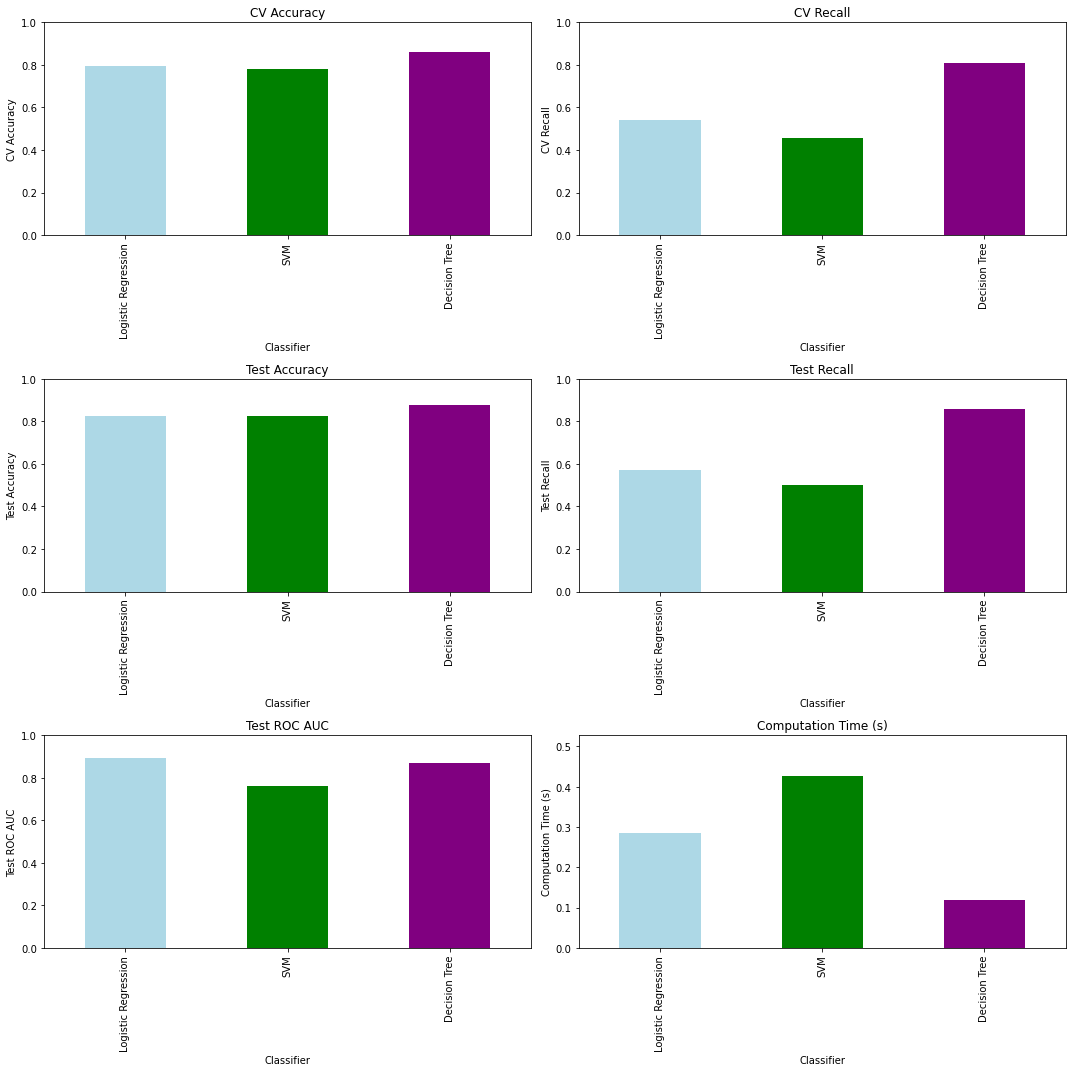

In [6]:
# Plotting the performance metrics using a bar plot

# Setting the colors
colors = ['lightblue', 'green', 'purple']

# Plotting
fig, ax = plt.subplots(3, 2, figsize=(15, 15))

metrics = ["CV Accuracy", "CV Recall", "Test Accuracy", "Test Recall", "Test ROC AUC", "Computation Time (s)"]
for i, metric in enumerate(metrics):
    results_df[metric].plot(kind='bar', ax=ax[i//2, i%2], color=colors)
    ax[i//2, i%2].set_title(metric)
    ax[i//2, i%2].set_ylabel(metric)
    ax[i//2, i%2].set_xlabel('Classifier')
    ax[i//2, i%2].set_ylim([0, 1] if "Time" not in metric else [0, results_df[metric].max() + 0.1])

plt.tight_layout()
plt.show()


In [ ]:
# Feature scaling 

In [7]:
from sklearn.preprocessing import StandardScaler

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5, :]  # Displaying the first 5 rows of the scaled training data


array([[-1.19424348, -1.06675246, -0.38634438, -0.70830886,  0.35100302,
         1.14020657,  0.32079167, -1.        , -1.5325259 ],
       [ 0.21592346,  0.79753468, -1.22993871, -0.85994033, -0.21165105,
         0.60677881, -1.51321353,  1.        ,  0.17621378],
       [ 0.64683448,  0.11069205,  1.853544  ,  1.51904259, -1.12396229,
        -1.11024995,  1.205411  , -1.        ,  0.17621378],
       [ 1.68390979,  0.60129393, -0.90995465, -0.60138149, -0.67569728,
        -1.4224295 ,  1.21124521, -1.        ,  0.17621378],
       [ 0.05222014,  1.87685881, -1.28811763, -0.7427431 ,  0.05631326,
        -0.30152217,  1.58678521, -1.        ,  1.88495346]])

In [8]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Logistic Regression
lr_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Grid search for Logistic Regression
lr_grid = GridSearchCV(LogisticRegression(max_iter=10000), lr_params, cv=k, scoring='accuracy')
lr_grid.fit(X_train_scaled, y_train)

# Best hyperparameters for Logistic Regression
lr_best_params = lr_grid.best_params_
lr_best_params


{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

In [1]:
# Hyperparameter grid for SVM
svm_params = {
    'C': [0.001, 0.01, 0.1],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Grid search for SVM
svm_grid = GridSearchCV(SVC(probability=True), svm_params, cv=k, scoring='accuracy')
svm_grid.fit(X_train_scaled, y_train)

# Best hyperparameters for SVM
svm_best_params = svm_grid.best_params_
svm_best_params


NameError: name 'GridSearchCV' is not defined

In [10]:
# Hyperparameter grid for Decision Tree
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search for Decision Tree
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=k, scoring='accuracy')
dt_grid.fit(X_train_scaled, y_train)

# Best hyperparameters for Decision Tree
dt_best_params = dt_grid.best_params_
dt_best_params


{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [11]:
# Initializing a dictionary to store the optimized results
optimized_results = {}

# Training and evaluating the classifiers with the best hyperparameters
for name, clf in classifiers.items():
    
    if name == "Logistic Regression":
        clf.set_params(**lr_best_params)
    elif name == "SVM":
        clf.set_params(**svm_best_params)
    elif name == "Decision Tree":
        clf.set_params(**dt_best_params)
    
    # Training the model and making predictions on the test set
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    y_pred_proba = clf.predict_proba(X_test_scaled)[:,1]
    
    # Evaluating the model on the test set
    test_acc = accuracy_score(y_test, y_pred)
    test_recall = recall_score(y_test, y_pred)
    test_roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Storing the results
    optimized_results[name] = {
        "Test Accuracy": test_acc,
        "Test Recall": test_recall,
        "Test ROC AUC": test_roc_auc,
    }

optimized_results_df = pd.DataFrame(optimized_results).T
optimized_results_df


,Test Accuracy,Test Recall,Test ROC AUC
Logistic Regression,0.9125,0.928571,0.984203
SVM,0.9375,0.928571,0.975275
Decision Tree,0.9000,0.928571,0.907967


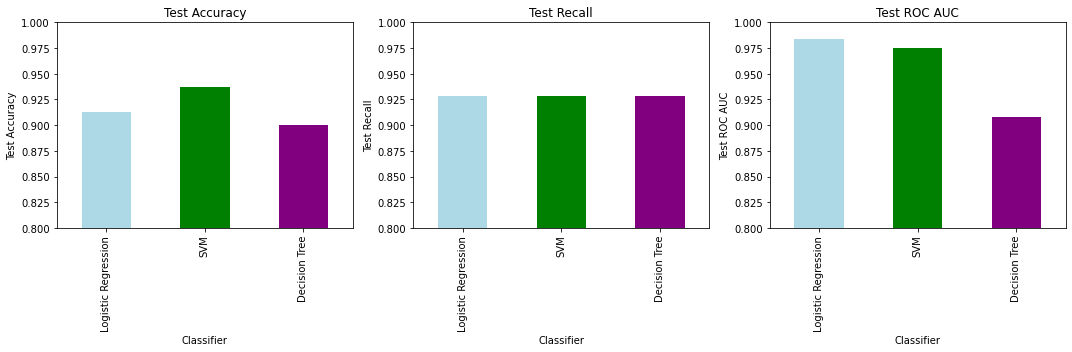

In [12]:
# Plotting the improved performance metrics using a bar plot

# Setting the colors
colors = ['lightblue', 'green', 'purple']

# Plotting
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

metrics = ["Test Accuracy", "Test Recall", "Test ROC AUC"]
for i, metric in enumerate(metrics):
    optimized_results_df[metric].plot(kind='bar', ax=ax[i], color=colors)
    ax[i].set_title(metric)
    ax[i].set_ylabel(metric)
    ax[i].set_xlabel('Classifier')
    ax[i].set_ylim([0.8, 1])

plt.tight_layout()
plt.show()


NameError: name 'logreg' is not defined